[Reference](https://kbarreiro.medium.com/monte-carlo-simulation-with-python-3f19dd4f531f)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_theme(style="ticks", palette="ch:s=.25,rot=-.25")

In [2]:
RA = 300  # rooms available
RP = 120  # room price
OC = 100  # overbooking cost
RL = 310  # reservation limit
demand_μ = 320  # mean for customer demand
demand_σ = 15  # standard deviation for customer demand
cancellation_p = 0.04  # probability of cancellation

In [3]:
# random number generator
rng = np.random.default_rng()
# generate random number from normal distribution
CD = rng.normal(loc=demand_μ, scale=demand_σ)

# Reservations Made (RM)


In [4]:
RM = min(RL, CD)

# Cancellations (CN)


In [5]:
CN = rng.binomial(n=RM, p=cancellation_p)

# Customer Arrivals (CA)


In [6]:
CA = RM - CN

# Overbooked Customers (OS)


In [7]:
OS = max(0, CA - RA)

# Net Revenue (NR)


In [8]:
NR = (min(CA, RA) * RP) - (OS * OC)

In [9]:
def net_revenue(n=0, RA=0, RP=0, OC=0, RL=[],loc=0, scale=0, CNP=0):
    """
    net_revenue simulates net revenue for 
    the hotel model described in the notebook, 
    given a list of reservation limits (RL).
    :param n: net revenue simulations to make per reservation limit
    :param RA: rooms available
    :param RP: room price
    :param OC: overbooking cost
    :param RL: reservation limits
    :param loc: mean for customer demand
    :param scale: standard deviation for customer demand
    :param CNP: probability of cancellation
    :return: pandas.DataFrame containing n simulated net revenue 
    values for each reservation limit.
    """
    
    # Simulated net revenue (NR) values for 
    # each reservation limit (RL)
    net_revenue_df = pd.DataFrame({})
       
    # Simulated Data
    for i in range(len(RL)):
        NR_arr = []  # Array of n net revenue simulations
        
        # Simulate n net revenue values for 
        # the reservation limit RL[i]
        for s in range(n):
            # random number generator
            rng = np.random.default_rng()  
            # random number from normal distribution 
            # for customer demand
            CD = rng.normal(loc=loc, scale=scale)
            # reservations made
            RM = min(RL[i], CD)
            # random number from binomial distribution 
            # for cancellations            
            CN = rng.binomial(n=RM, p=cancellation_p)  
            # customer arrivals
            CA = RM - CN
            # overbooked customers
            OS = max(0, CA - RA)
            # net revenue
            NR = round((min(CA, RA) * RP) - (OS * OC), 2)
            # Populate NR_arr
            NR_arr.append(NR)
            
        # Add the simulated net revenue  array for 
        # the current reservation limit to net_revenue_df
        net_revenue_df[RL[i]] = pd.Series(data=NR_arr)
    
    return net_revenue_df

In [10]:
simulation = net_revenue(
    n=2500, 
    RA=300, 
    RP=120, 
    OC=100, 
    RL=[300, 305, 310, 315, 320, 325, 330],
    loc=320, 
    scale=15, 
    CNP=0.04
)
print(simulation)


          300       305       310       315       320       325       330
0     35040.0  35280.00  33393.70  34853.11  35200.00  34640.45  34806.51
1     34560.0  34800.00  36000.00  35920.93  35213.47  34425.36  34100.00
2     34560.0  35040.00  35880.00  35800.00  35480.77  35000.00  34939.40
3     34800.0  35040.00  35400.00  35735.33  35700.00  34616.30  33600.00
4     33960.0  34320.00  35880.00  35400.00  35729.18  34600.00  34300.00
...       ...       ...       ...       ...       ...       ...       ...
2495  33360.0  35400.00  35400.00  35998.41  35200.00  35687.47  34800.00
2496  33720.0  34800.00  35743.51  35576.08  33514.38  35886.89  35482.57
2497  34680.0  35520.00  35880.00  35700.00  35700.00  34300.00  35585.11
2498  34200.0  35160.00  35520.00  35800.00  35905.50  34600.00  35200.00
2499  34680.0  34873.63  35880.00  35924.92  35200.00  35700.00  34100.00

[2500 rows x 7 columns]


# Simulation Results


In [11]:
stats = simulation.describe()
print(stats)

                300           305           310           315           320  \
count   2500.000000   2500.000000   2500.000000   2500.000000   2500.000000   
mean   34497.498512  34964.493116  35362.545936  35384.906824  35192.120504   
std      512.639821    633.745197    686.955689    680.605405    644.645116   
min    31022.140000  31129.510000  30673.320000  30598.720000  29974.210000   
25%    34200.000000  34680.000000  35160.000000  35293.150000  35000.000000   
50%    34560.000000  35040.000000  35600.000000  35600.000000  35300.000000   
75%    34800.000000  35400.000000  35800.000000  35800.000000  35600.000000   
max    35520.000000  36000.000000  36000.000000  36000.000000  36000.000000   

                325           330  
count   2500.000000   2500.000000  
mean   34961.652896  34833.005192  
std      681.401906    697.238352  
min    31201.360000  28109.260000  
25%    34600.000000  34315.632500  
50%    35000.000000  34838.580000  
75%    35442.325000  35394.860000  


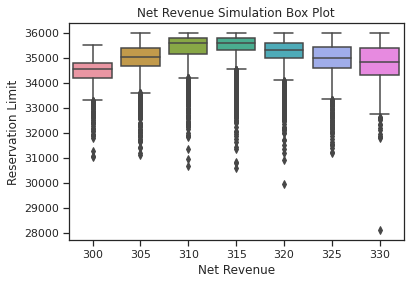

In [12]:
sns.boxplot(data=simulation)
plt.xlabel("Net Revenue")
plt.ylabel("Reservation Limit")
plt.title("Net Revenue Simulation Box Plot") 
plt.show()

In [13]:
ci_df = pd.DataFrame({})
for index, rl in enumerate(simulation.keys()):
    ci_df[rl] = st.t.interval(alpha=0.95, 
                              df=simulation.count()[rl]-1, 
                              loc=simulation.mean()[rl], 
                              scale=st.sem(simulation[rl]))
ci_df = ci_df.transpose()
ci_df = ci_df.rename(columns={0: "lower CI", 1: "upper CI"})
ci_df["standard error"] = [st.sem(simulation[rl]) for i, rl in enumerate(simulation.keys())]
ci_df.transpose()

,300,305,310,315,320,325,330
lower CI,34477.393663,34939.638723,35335.604719,35358.214654,35166.838635,34934.929489,34805.660707
upper CI,34517.603361,34989.347509,35389.487153,35411.598994,35217.402373,34988.376303,34860.349677
standard error,10.252796,12.674904,13.739114,13.612108,12.892902,13.628038,13.944767


In [14]:
stats = round(stats.append(ci_df.transpose()), 2)
print(stats)

                     300       305       310       315       320       325  \
count            2500.00   2500.00   2500.00   2500.00   2500.00   2500.00   
mean            34497.50  34964.49  35362.55  35384.91  35192.12  34961.65   
std               512.64    633.75    686.96    680.61    644.65    681.40   
min             31022.14  31129.51  30673.32  30598.72  29974.21  31201.36   
25%             34200.00  34680.00  35160.00  35293.15  35000.00  34600.00   
50%             34560.00  35040.00  35600.00  35600.00  35300.00  35000.00   
75%             34800.00  35400.00  35800.00  35800.00  35600.00  35442.32   
max             35520.00  36000.00  36000.00  36000.00  36000.00  36000.00   
lower CI        34477.39  34939.64  35335.60  35358.21  35166.84  34934.93   
upper CI        34517.60  34989.35  35389.49  35411.60  35217.40  34988.38   
standard error     10.25     12.67     13.74     13.61     12.89     13.63   

                     330  
count            2500.00  
mean     

In [15]:
percentiles = np.arange(0, 1.05, 0.05) 
net_revenue = [round(np.percentile(simulation, q * 100), 2) for q in percentiles]
net_revenue = pd.DataFrame({
    "Percentile": percentiles,
    "Net Revenue": net_revenue
})
print(net_revenue)

    Percentile  Net Revenue
0         0.00     28109.26
1         0.05     33800.00
2         0.10     34152.72
3         0.15     34320.00
4         0.20     34500.00
5         0.25     34600.00
6         0.30     34725.09
7         0.35     34813.00
8         0.40     34920.00
9         0.45     35040.00
10        0.50     35160.00
11        0.55     35227.15
12        0.60     35300.00
13        0.65     35400.00
14        0.70     35500.00
15        0.75     35600.00
16        0.80     35644.08
17        0.85     35760.00
18        0.90     35834.75
19        0.95     35900.00
20        1.00     36000.00


In [16]:
bins = np.arange(20000, 50000, 2500)
hist, bins = np.histogram(simulation, bins=bins)
freq_dist = pd.DataFrame({
    "Net Revenue": pd.Series(bins),
    "Frequency": pd.Series(hist)
})
print(freq_dist)

    Net Revenue  Frequency
0         20000        0.0
1         22500        0.0
2         25000        0.0
3         27500        2.0
4         30000      130.0
5         32500     7190.0
6         35000    10178.0
7         37500        0.0
8         40000        0.0
9         42500        0.0
10        45000        0.0
11        47500        NaN


<bound method Axes.hist of <matplotlib.axes._subplots.AxesSubplot object at 0x7f989a1d8b10>>


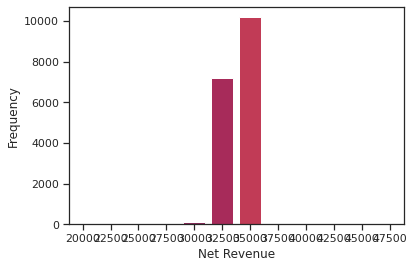

In [17]:
hist = sns.barplot(
           x=freq_dist["Net Revenue"], 
           y=freq_dist["Frequency"],
           palette="rocket").hist#.set_xlim(2, 8)
print(hist)